In [92]:
# EDA Code modified from cocodataset/cocoapi and svdesai/eda-coco

import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pdb
import os
from pycocotools.coco import COCO
from skimage import io


In [93]:
# Setting source paths

src_root = '/Users/sneha/Downloads/Parallel Computing/Project/COCO_Dataset/coco/'
src_subset = 'images/train2017/'
src_file = src_root+'annotations/instances_train2017.json'
src_desc = 'train_coco' 

coco_obj = COCO(src_file)

loading annotations into memory...
Done (t=190.26s)
creating index...
index created!


In [94]:
# Loading annotations file

with open(src_file, 'r') as f:
    root = json.load(f)

root.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [95]:
# Getting basic information

n_images = len(root['images'])
n_boxes = len(root['annotations'])
n_categ = len(root['categories'])

heights = [x['height'] for x in root['images']]
widths = [x['width'] for x in root['images']]

print('Dataset Name: ',src_desc)
print('Number of images: ',n_images)
print('Number of bounding boxes: ', n_boxes)
print('Number of classes: ', n_categ)
print('Max min avg height: ', max(heights), min(heights), int(sum(heights)/len(heights)))
print('Max min avg width: ', max(widths), min(widths), int(sum(widths)/len(widths)))

Dataset Name:  train_coco
Number of images:  118287
Number of bounding boxes:  860001
Number of classes:  80
Max min avg height:  640 51 484
Max min avg width:  640 59 577


In [96]:
# Plotting Objects per Image Histogram

img2nboxes = {}

for ann in root['annotations']:
    img_id = ann['image_id']
    
    if img_id in img2nboxes.keys():
        img2nboxes[img_id] += 1
    else:
        img2nboxes[img_id] = 1

nboxes_list = list(img2nboxes.values())

min_nboxes = min(nboxes_list)
max_nboxes = max(nboxes_list)
avg_nboxes = int(sum(nboxes_list)/len(nboxes_list))

In [97]:
print(len(nboxes_list))
print(min_nboxes, max_nboxes, avg_nboxes)

117266
1 93 7


(array([8.9262e+04, 1.9245e+04, 6.2710e+03, 1.8280e+03, 4.8700e+02,
        1.3800e+02, 2.2000e+01, 9.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([ 1. , 10.2, 19.4, 28.6, 37.8, 47. , 56.2, 65.4, 74.6, 83.8, 93. ]),
 <BarContainer object of 10 artists>)

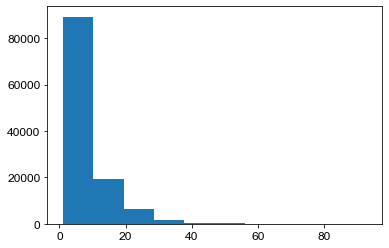

In [98]:

N_points = 117266
n_bins = 10

plt.hist(nboxes_list, bins=n_bins)
#plt.xlabel('No. of Objects')
#plt.ylabel('No. of Images')

Text(0.5, 1.0, 'Classwise distribution')

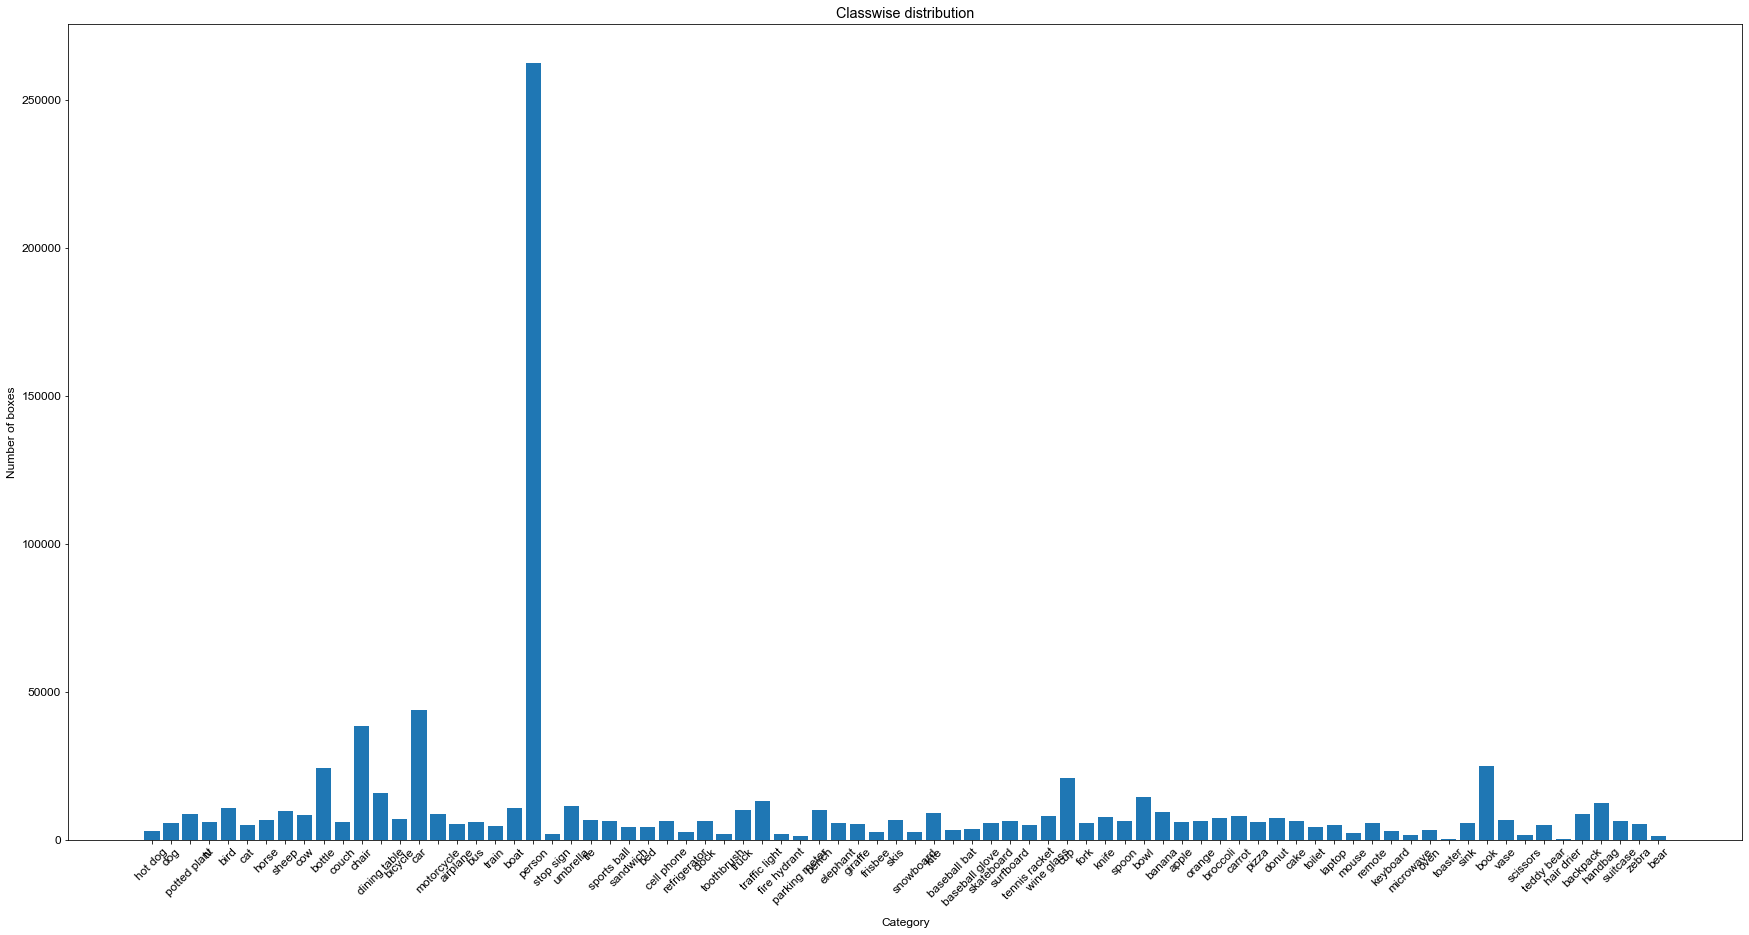

In [40]:
# Classwise distribution

class2nboxes = {} 

for ann in root['annotations']:
    cat_id = ann['category_id']
    cat_name = [x['name'] for x in root['categories'] if x['id']==cat_id][0]
    
    if cat_name in class2nboxes.keys():
        class2nboxes[cat_name] += 1
    else:
        class2nboxes[cat_name] = 1
        
        
categories=list(class2nboxes.keys());
distribution=list(class2nboxes.values());


plt.figure(figsize=(30,15))
plt.bar(categories,distribution)
plt.xlabel('Category',labelpad=10)
plt.xticks(rotation=45)
plt.ylabel('Number of boxes')
plt.title('Classwise distribution')



Text(0.5, 1.0, 'Classwise distribution Top20')

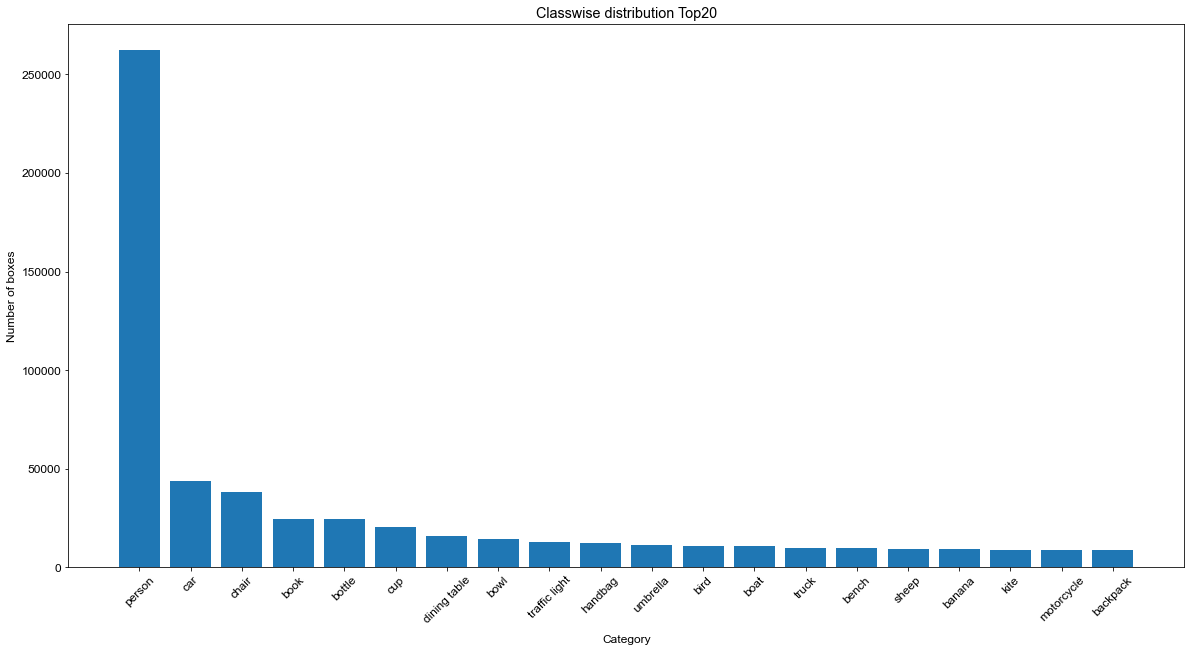

In [44]:
#Top 20 Categories

sorted_c2b = [(k,v) for k, v in sorted(class2nboxes.items(), reverse=True, key=lambda item: item[1])][:20]

x=[idx[0] for idx in sorted_c2b];
y=[idx[1] for idx in sorted_c2b];

plt.figure(figsize=(20,10))
plt.bar(x,y)
plt.xlabel('Category',labelpad=10)
plt.xticks(rotation=45)
plt.ylabel('Number of boxes')
plt.title('Classwise distribution Top20')


Object categories:  ['dog', 'dog', 'car', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person', 'person']


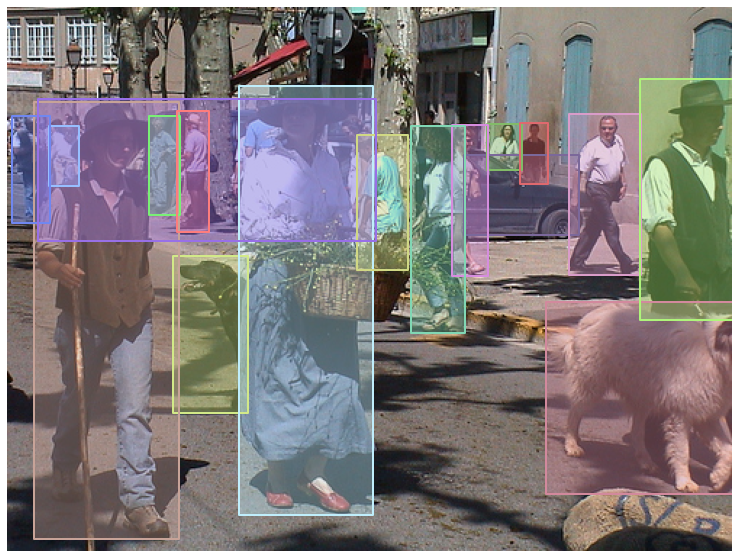

In [88]:
#Load random images from dataset for selected categories

catIds = coco_obj.getCatIds(catNms=['person','dog','car'])
imgIds = coco_obj.getImgIds(catIds=catIds)


img = coco_obj.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
#print(img)


# load and display image

I = io.imread('%s/%s/%s'%(src_root,src_subset,img['file_name']))
# use url to load image
#I = io.imread(img['coco_url'])

plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(I)


# Show annotations for objects in image

annIds = coco_obj.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_obj.loadAnns(annIds)

# disable segmentation

for a in anns:
    if 'segmentation' in a.keys():
        a['segmentation'] = []
coco_obj.showAnns(anns, draw_bbox=True)

categ_map = {x['id']: x['name'] for x in root['categories']}
classes = [categ_map[a['category_id']] for a in anns]
print("Object categories: ",classes)


In [91]:
#List of categories

for cat in root['categories']: print(cat['id'],cat['name'])


1 person
2 bicycle
3 car
4 motorcycle
5 airplane
6 bus
7 train
8 truck
9 boat
10 traffic light
11 fire hydrant
13 stop sign
14 parking meter
15 bench
16 bird
17 cat
18 dog
19 horse
20 sheep
21 cow
22 elephant
23 bear
24 zebra
25 giraffe
27 backpack
28 umbrella
31 handbag
32 tie
33 suitcase
34 frisbee
35 skis
36 snowboard
37 sports ball
38 kite
39 baseball bat
40 baseball glove
41 skateboard
42 surfboard
43 tennis racket
44 bottle
46 wine glass
47 cup
48 fork
49 knife
50 spoon
51 bowl
52 banana
53 apple
54 sandwich
55 orange
56 broccoli
57 carrot
58 hot dog
59 pizza
60 donut
61 cake
62 chair
63 couch
64 potted plant
65 bed
67 dining table
70 toilet
72 tv
73 laptop
74 mouse
75 remote
76 keyboard
77 cell phone
78 microwave
79 oven
80 toaster
81 sink
82 refrigerator
84 book
85 clock
86 vase
87 scissors
88 teddy bear
89 hair drier
90 toothbrush
